In [22]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [23]:
# loading
y = np.genfromtxt('./data/label.csv',delimiter=',')

In [24]:
X = np.genfromtxt('./data/features.csv',delimiter=',')

In [25]:
#splitting
x_train, x_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 test_size = .1,
                                                 random_state=12)

In [26]:
# resampling the traninging data to change the balnce the data
sm = SMOTE(random_state=12)
x_res, y_res = sm.fit_sample(x_train, y_train)

In [27]:
# turning the array to tensors
y_train_res = tf.convert_to_tensor(y_res, dtype='float32')
x_train_res = tf.convert_to_tensor(x_res, dtype='float32')

In [28]:
X_val = tf.convert_to_tensor(x_val, dtype='float32')
Y_val = tf.convert_to_tensor(y_val, dtype='float32')

In [29]:
# makeing the tensorflow data 
data_train = tf.data.Dataset.from_tensor_slices(
    (x_train_res, y_train_res)

).cache()

data_validate = tf.data.Dataset.from_tensor_slices(
    (X_val, Y_val)).cache()

In [30]:
X[0].shape

(18,)

In [31]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(18, 1, 1)))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 18)                0         
_________________________________________________________________
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(data_train.shuffle(10000).batch(32), epochs=8, validation_data=data_validate.batch(32))

Epoch 1/8
644/644 [==============================] - 1s 1ms/step - loss: 0.1840 - accuracy: 0.9352 - val_loss: 0.2097 - val_accuracy: 0.9133
Epoch 2/8
644/644 [==============================] - 1s 1ms/step - loss: 0.1799 - accuracy: 0.9370 - val_loss: 0.2229 - val_accuracy: 0.9067
Epoch 3/8
644/644 [==============================] - 1s 1ms/step - loss: 0.1820 - accuracy: 0.9347 - val_loss: 0.2076 - val_accuracy: 0.9133
Epoch 4/8
644/644 [==============================] - 1s 1000us/step - loss: 0.1790 - accuracy: 0.9371 - val_loss: 0.2141 - val_accuracy: 0.9100
Epoch 5/8
644/644 [==============================] - 1s 1ms/step - loss: 0.1773 - accuracy: 0.9376 - val_loss: 0.2231 - val_accuracy: 0.9087
Epoch 6/8
644/644 [==============================] - 1s 960us/step - loss: 0.1775 - accuracy: 0.9364 - val_loss: 0.1979 - val_accuracy: 0.9193
Epoch 7/8
644/644 [==============================] - 1s 1ms/step - loss: 0.1753 - accuracy: 0.9380 - val_loss: 0.2197 - val_accuracy: 0.9107
Epoch 8/

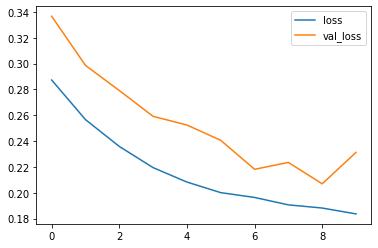

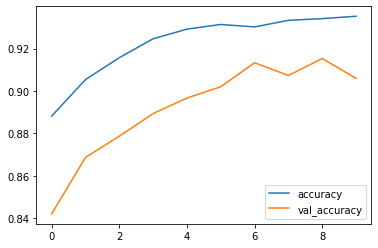

In [35]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.close()